# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA 

In [2]:
df = pd.read_csv("21-weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Categorical Variables

- The dataset into categorical and numerical variables.

In [5]:
categorical = []

for i in df.columns:
    if df[i].dtype == 'O':
        categorical.append(i)

In [6]:
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [7]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


- `RainTomorrow` is the target variable.

In [8]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [9]:
hasNaNCategorical = []

for i in categorical:
    if df[i].isnull().sum() != 0:
        hasNaNCategorical.append(i)

In [10]:
hasNaNCategorical

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

- There are 5 categorical variable that contains missing values.

### Check Cardinality

In [11]:
for i in categorical:
    print(i , "has", len(df[i].unique()), "labels.")

Date has 3436 labels.
Location has 49 labels.
WindGustDir has 17 labels.
WindDir9am has 17 labels.
WindDir3pm has 17 labels.
RainToday has 3 labels.
RainTomorrow has 3 labels.


### Date Column Parse

In [12]:
df["Date"].value_counts()

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

- Convert argument to datetime. This function converts a scalar, array-like, `Series` or `DataFrame`/dict-like to a pandas datetime object.

In [14]:
df['Year'] = df['Date'].dt.year

In [15]:
df['Year']

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145455    2017
145456    2017
145457    2017
145458    2017
145459    2017
Name: Year, Length: 145460, dtype: int32

In [16]:
df['Month'] = df['Date'].dt.month

In [17]:
df['Month']

0         12
1         12
2         12
3         12
4         12
          ..
145455     6
145456     6
145457     6
145458     6
145459     6
Name: Month, Length: 145460, dtype: int32

In [18]:
df['Day'] = df['Date'].dt.day

In [19]:
df['Day']

0          1
1          2
2          3
3          4
4          5
          ..
145455    21
145456    22
145457    23
145458    24
145459    25
Name: Day, Length: 145460, dtype: int32

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

- I added Year, Month and Day columns. Also, I converted Date to datetime64[ns] date type.

In [21]:
df.drop('Date', axis = 1, inplace=True)

In [22]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


- I want to create categorical variables list.

In [23]:
categorical = []

for i in df.columns:
    if df[i].dtype == 'O':
        categorical.append(i)

In [24]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [25]:
df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

### Location Columns Analyse

In [26]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [27]:
df['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

- ONE HOT ENCODING

In [28]:
pd.get_dummies(df['Location'], drop_first=True, dtype=int).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### WindGustDir

In [29]:
df['WindGustDir'].value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

- One Hot Encoding

In [30]:
pd.get_dummies(df['WindGustDir'], drop_first=True, dtype=int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


- Missing Values

In [31]:
pd.get_dummies(df['WindGustDir'],drop_first=True, dummy_na=True).sum(axis = 0)

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

### WindDir9am

In [32]:
df['WindDir9am'].value_counts()

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

In [33]:
pd.get_dummies(df['WindDir9am'], drop_first=True, dtype=int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
pd.get_dummies(df['WindDir9am'], drop_first=True, dummy_na=True).sum()

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

### WindDir3pm

In [35]:
df['WindDir3pm'].value_counts()

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

In [36]:
pd.get_dummies(df['WindDir3pm'], drop_first=True, dtype= int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [37]:
pd.get_dummies(df['WindDir3pm'], drop_first=True, dummy_na=True).sum()

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

### RainToday

In [38]:
df['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [39]:
pd.get_dummies(df['RainToday'], drop_first=True, dummy_na=True).sum()

Yes    31880
NaN     3261
dtype: int64

## Numerical Variables

In [40]:
numerical = []

for i in df.columns:
    if df[i].dtype != 'O':
        numerical.append(i)

In [41]:
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [42]:
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

### Outliers in Numerical Variables

In [43]:
round(df[numerical].describe(), 2)
# Show 2 digit after dot

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00,145460.00,145460.00,145460.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68,2012.77,6.40,15.71
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94,2.54,3.43,8.79
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,2007.00,1.00,1.00
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60,2011.00,3.00,8.00
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,2013.00,6.00,16.00
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40,2015.00,9.00,23.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,2017.00,12.00,31.00


- I observed that Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm, Temp9am , Temp3pm may contain outliers.

#### Box Plot of Outliers

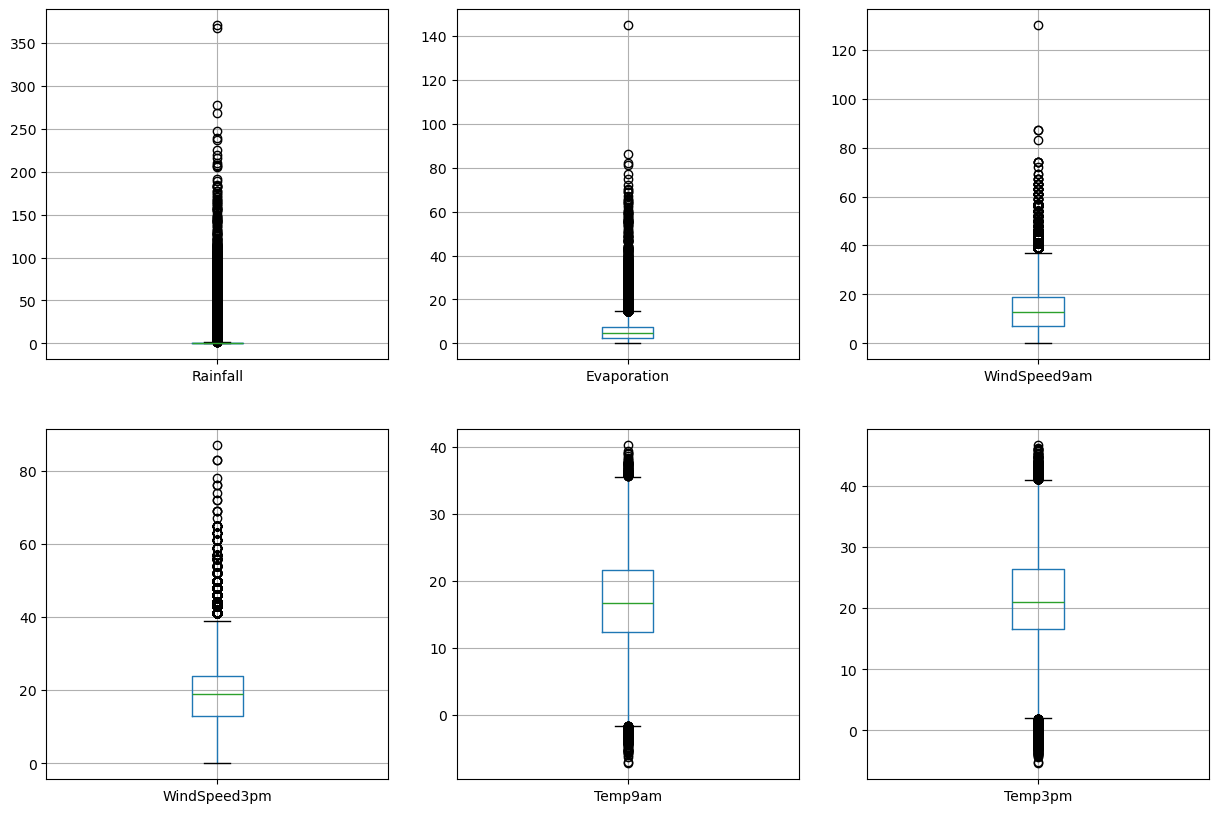

In [44]:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
fig = df.boxplot(column='Rainfall')

plt.subplot(2, 3, 2)
fig = df.boxplot(column='Evaporation')

plt.subplot(2, 3, 3)
fig = df.boxplot(column='WindSpeed9am')

plt.subplot(2, 3, 4)
fig = df.boxplot(column='WindSpeed3pm')

plt.subplot(2, 3, 5)
fig = df.boxplot(column='Temp9am')

plt.subplot(2, 3, 6)
fig = df.boxplot(column='Temp3pm')

##### Histogram of Outliers

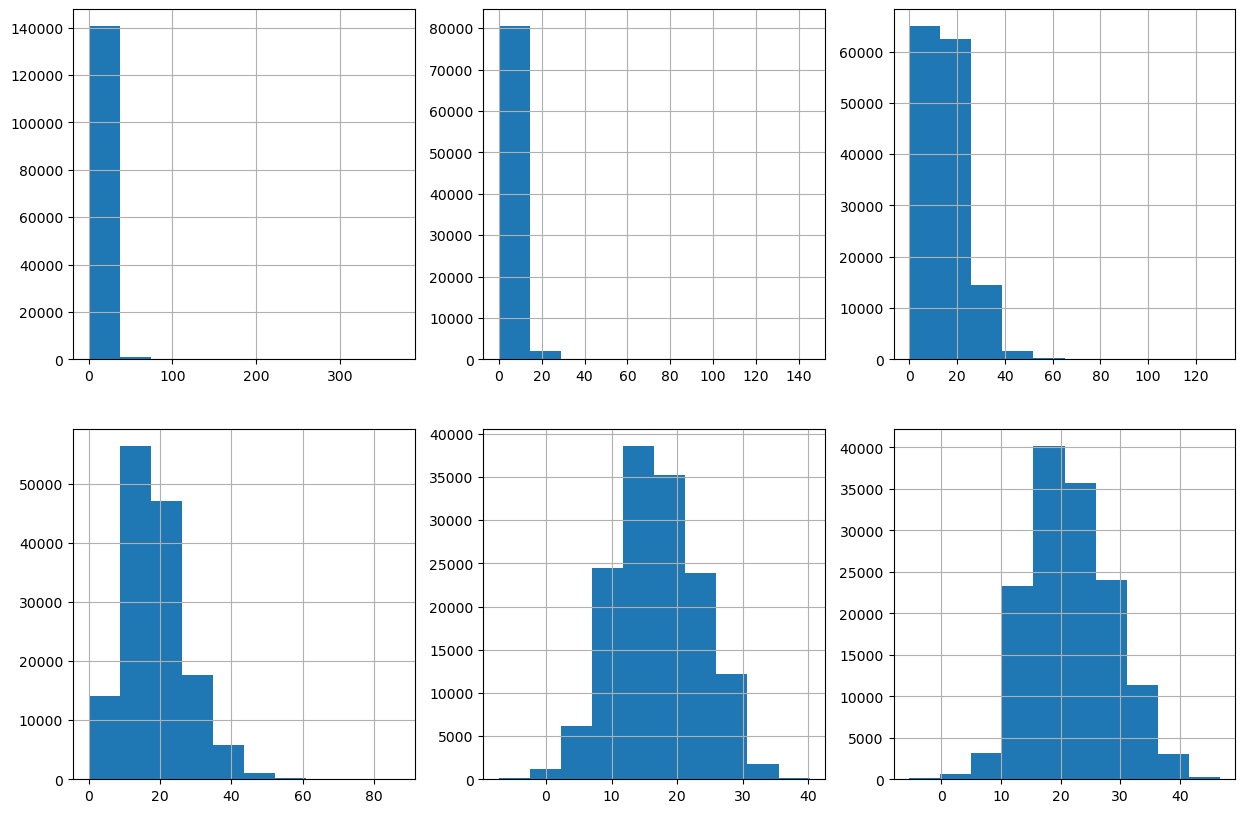

In [45]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
fig = df['Rainfall'].hist()

plt.subplot(2,3,2)
fig = df['Evaporation'].hist()

plt.subplot(2,3,3)
fig = df['WindSpeed9am'].hist()

plt.subplot(2,3,4)
fig = df['WindSpeed3pm'].hist()

plt.subplot(2,3,5)
fig = df['Temp9am'].hist()

plt.subplot(2,3,6)
fig = df['Temp3pm'].hist()

# Scaling

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [49]:
X_train.shape, X_test.shape

((101822, 24), (43638, 24))

# Feature Engineering

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101822 entries, 117502 to 7624
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       101822 non-null  object 
 1   MinTemp        100797 non-null  float64
 2   MaxTemp        100954 non-null  float64
 3   Rainfall       99541 non-null   float64
 4   Evaporation    57765 non-null   float64
 5   Sunshine       52852 non-null   float64
 6   WindGustDir    94590 non-null   object 
 7   WindGustSpeed  94636 non-null   float64
 8   WindDir9am     94496 non-null   object 
 9   WindDir3pm     98858 non-null   object 
 10  WindSpeed9am   100596 non-null  float64
 11  WindSpeed3pm   99671 non-null   float64
 12  Humidity9am    99991 non-null   float64
 13  Humidity3pm    98659 non-null   float64
 14  Pressure9am    91259 non-null   float64
 15  Pressure3pm    91278 non-null   float64
 16  Cloud9am       62668 non-null   float64
 17  Cloud3pm       60266 non-null  

In [51]:
categorical = []
numerical = []
for i in X_train.columns:
    if X_train[i].dtype == 'O':
        categorical.append(i)
    else:
        numerical.append(i)

In [52]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [53]:
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [54]:
X_train[categorical].isnull().sum()

Location          0
WindGustDir    7232
WindDir9am     7326
WindDir3pm     2964
RainToday      2281
dtype: int64

In [55]:
X_train[numerical].isnull().sum()

MinTemp           1025
MaxTemp            868
Rainfall          2281
Evaporation      44057
Sunshine         48970
WindGustSpeed     7186
WindSpeed9am      1226
WindSpeed3pm      2151
Humidity9am       1831
Humidity3pm       3163
Pressure9am      10563
Pressure3pm      10544
Cloud9am         39154
Cloud3pm         41556
Temp9am           1215
Temp3pm           2530
Year                 0
Month                0
Day                  0
dtype: int64

- There are 2 methods for impute missing valus.
    - `Mean` : There are a lots of outliers and they can raise the average. This is not recommend.
    - `Median` : This will be the safest method.
  

### Impute missing numerical variables

In [56]:
for col in X_train.columns:
    if col in numerical:
        median = X_train[col].median()
        X_train[col].fillna(median, inplace=True)

for col in X_test.columns:
    if col in numerical:
        median = X_train[col].median()
        X_test[col].fillna(median, inplace=True)

C:\Users\Ali İhsan Sancar\AppData\Local\Temp\ipykernel_16924\635735469.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median, inplace=True)
C:\Users\Ali İhsan Sancar\AppData\Local\Temp\ipykernel_16924\635735469.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [57]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [58]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

### Impute missing categorical variables

- The most common method is to fill it with mod

In [59]:
df[categorical].isnull().sum()

Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
RainToday       3261
dtype: int64

In [60]:
for col in [X_train, X_test]:
    col['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    col['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    col['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    col['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

C:\Users\Ali İhsan Sancar\AppData\Local\Temp\ipykernel_16924\1703475547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  col['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
C:\Users\Ali İhsan Sancar\AppData\Local\Temp\ipykernel_16924\1703475547.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [61]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [62]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [63]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [64]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

- I can see that there are no any missing values in train and test datas.

### Remove Outliers

- We observed that Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm, Temp9am , Temp3pm may contain outliers.

In [65]:
# Rainfall
IQR = df['Rainfall'].quantile(0.75) - df['Rainfall'].quantile(0.25)
lower_fence = df['Rainfall'].quantile(0.25) - (IQR * 3)
upper_fence = df['Rainfall'].quantile(0.75) + (IQR * 3)
print("Outliers are values <", lower_fence, "or > ", upper_fence)

Outliers are values < -2.4000000000000004 or >  3.2


In [66]:
# Evaporation
IQR = df['Evaporation'].quantile(0.75) - df['Evaporation'].quantile(0.25)
lower_fence = df['Evaporation'].quantile(0.25) - (IQR * 3)
upper_fence = df['Evaporation'].quantile(0.75) + (IQR * 3)
print("Outliers are values <", lower_fence, "or > ", upper_fence)

Outliers are values < -11.800000000000002 or >  21.800000000000004


In [67]:
# WindSpeed9am
IQR = df['WindSpeed9am'].quantile(0.75) - df['WindSpeed9am'].quantile(0.25)
lower_fence = df['WindSpeed9am'].quantile(0.25) - (IQR * 3)
upper_fence = df['WindSpeed9am'].quantile(0.75) + (IQR * 3)
print("Outliers are values <", lower_fence, "or > ", upper_fence)

Outliers are values < -29.0 or >  55.0


In [68]:
# WindSpeed3pm
IQR = df['WindSpeed3pm'].quantile(0.75) - df['WindSpeed3pm'].quantile(0.25)
lower_fence = df['WindSpeed3pm'].quantile(0.25) - (IQR * 3)
upper_fence = df['WindSpeed3pm'].quantile(0.75) + (IQR * 3)
print("Outliers are values <", lower_fence, "or > ", upper_fence)

Outliers are values < -20.0 or >  57.0


In [69]:
# Temp9am
IQR = df['Temp9am'].quantile(0.75) - df['Temp9am'].quantile(0.25)
lower_fence = df['Temp9am'].quantile(0.25) - (IQR * 3)
upper_fence = df['Temp9am'].quantile(0.75) + (IQR * 3)
print("Outliers are values <", lower_fence, "or > ", upper_fence)

Outliers are values < -15.600000000000001 or >  49.5


In [70]:
# Temp3pm
IQR = df['Temp3pm'].quantile(0.75) - df['Temp3pm'].quantile(0.25)
lower_fence = df['Temp3pm'].quantile(0.25) - (IQR * 3)
upper_fence = df['Temp3pm'].quantile(0.75) + (IQR * 3)
print("Outliers are values <", lower_fence, "or > ", upper_fence)

Outliers are values < -12.79999999999999 or >  55.79999999999999


In [71]:
def max_value(df, variable, maxValue):
    return df[variable].clip(upper=maxValue)

In [72]:
for df in [X_train, X_test]:
    df['Rainfall'] = max_value(df, 'Rainfall', 3.2)
    
    df['Evaporation'] = max_value(df, 'Evaporation', 21.8)
    
    df['WindSpeed9am'] = max_value(df, 'WindSpeed9am', 55)
    
    df['WindSpeed3pm'] = max_value(df, 'WindSpeed3pm', 57)
    
    df['Temp9am'] = max_value(df, 'Temp9am', 49.5)
    
    df['Temp3pm'] = max_value(df, 'Temp3pm', 55.7)

In [73]:
X_train.Rainfall.max(), X_test.Rainfall.max(), X_train.Rainfall.min(), X_test.Rainfall.min()

(3.2, 3.2, 0.0, 0.0)

In [74]:
X_train.Evaporation.max(), X_test.Evaporation.max(), X_train.Evaporation.min(), X_test.Evaporation.min()

(21.8, 21.8, 0.0, 0.0)

In [75]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [76]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [77]:
X_train.Temp9am.max(), X_test.Temp9am.max()

(40.2, 38.9)

In [78]:
X_train.Temp3pm.max(), X_test.Temp3pm.max()

(46.7, 46.1)

In [79]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000
mean,12.200929,23.215975,0.667324,5.147390,8.047340,39.958192,14.040423,18.658099,68.890770,51.568080,1017.630838,1015.230377,4.653189,4.701410,16.994748,21.670406,2012.771690,6.403135,15.712007
std,6.353729,7.076535,1.178971,2.797467,2.762232,13.111085,8.848853,8.694419,18.859616,20.499783,6.727362,6.660860,2.282479,2.107368,6.440370,6.838436,2.536969,3.426296,8.784913
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-6.200000,-4.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.200000,8.300000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.400000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,31.400000,47.300000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1038.900000,8.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


### Encode Categorical Variables

In [80]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [81]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
117502,PearceRAAF,E,NE,W,No
29580,Richmond,ESE,SSW,SSE,Yes
21308,NorfolkIsland,ESE,SE,SE,Yes
135305,Launceston,SE,ENE,ESE,No
28181,Richmond,ESE,NE,ESE,No


In [82]:
X_train['RainToday'] = X_train['RainToday'].map({'Yes': 1, 'No': 0})
X_test['RainToday'] = X_test['RainToday'].map({'Yes': 1, 'No': 0})

In [83]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
117502,PearceRAAF,E,NE,W,0
29580,Richmond,ESE,SSW,SSE,1
21308,NorfolkIsland,ESE,SE,SE,1
135305,Launceston,SE,ENE,ESE,0
28181,Richmond,ESE,NE,ESE,0


In [84]:
X_train = pd.concat([
    X_train[numerical],
    X_train['RainToday'],
    pd.get_dummies(X_train['Location'],dtype=int),
    pd.get_dummies(X_train['WindGustDir'],dtype=int),
    pd.get_dummies(X_train['WindDir9am'],dtype=int),
    pd.get_dummies(X_train['WindDir3pm'],dtype=int),
],axis = 1)

In [85]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
117502,23.9,37.7,0.0,4.8,12.3,41.0,15.0,24.0,36.0,37.0,...,0,0,0,0,0,0,0,1,0,0
29580,14.5,21.3,3.2,4.8,8.5,33.0,13.0,17.0,67.0,59.0,...,0,0,0,0,1,0,0,0,0,0
21308,14.6,17.6,3.2,0.2,1.3,43.0,24.0,22.0,90.0,85.0,...,0,0,0,1,0,0,0,0,0,0
135305,0.6,13.4,0.2,4.8,8.5,20.0,6.0,6.0,88.0,53.0,...,0,0,0,0,0,0,0,0,0,0
28181,16.6,26.0,0.0,6.2,8.5,37.0,7.0,26.0,63.0,40.0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
X_test = pd.concat([
    X_test[numerical],
    X_test['RainToday'],
    pd.get_dummies(X_test['Location'],dtype=int),
    pd.get_dummies(X_test['WindGustDir'],dtype=int),
    pd.get_dummies(X_test['WindDir9am'],dtype=int),
    pd.get_dummies(X_test['WindDir3pm'],dtype=int),
],axis = 1)

In [87]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
123551,5.9,15.8,3.2,3.8,9.3,61.0,13.0,15.0,65.0,63.0,...,0,0,0,0,0,0,1,0,0,0
90618,22.1,30.3,0.0,4.8,8.5,20.0,11.0,15.0,76.0,69.0,...,0,0,0,0,0,0,0,0,0,0
95813,26.8,33.6,3.2,5.0,4.3,43.0,0.0,19.0,84.0,75.0,...,0,0,0,0,0,0,0,0,0,0
70342,9.6,20.0,0.2,2.6,3.9,43.0,19.0,9.0,68.0,76.0,...,0,0,0,0,0,0,0,0,1,0
133845,8.8,24.4,0.0,4.8,8.5,30.0,6.0,17.0,76.0,49.0,...,0,1,0,0,0,0,0,0,0,0


In [112]:
print(pd.DataFrame(X_train_MinMaxScaled).isnull().sum().sum())  # Tüm NaN sayısı
print(y_train.isnull().sum())                     # Hedefte eksik var mı?


0
2299


In [113]:
y_train.shape

(101822,)

In [114]:
# NaN içeren satırların indekslerini al
missing_index = y_train[y_train.isnull()].index

# Hem X hem y'den o satırları sil
X_train = X_train.drop(index=missing_index)
y_train = y_train.drop(index=missing_index)


In [115]:
print(pd.DataFrame(X_train_MinMaxScaled).isnull().sum().sum())  # Tüm NaN sayısı
print(y_train.isnull().sum())                     # Hedefte eksik var mı?


0
0


In [116]:
X_train.shape, y_train.shape

((99523, 117), (99523,))

In [117]:
X_test.shape, y_test.shape

((43638, 117), (43638,))

# Scaling

In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
minMaxScaler = MinMaxScaler()
X_train_MinMaxScaled = minMaxScaler.fit_transform(X_train)
X_test_MinMaxScaled = minMaxScaler.transform(X_test)

# Logistic Regression and GridSearchCV

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [121]:
model = LogisticRegression()

In [127]:
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [128]:
params = dict(penalty = penalty, C=c_values, solver=solver, class_weight=class_weight)

In [129]:
cv = StratifiedKFold()

In [130]:
grid = GridSearchCV(estimator=model, param_grid=params, scoring = 'accuracy', cv=cv)

In [131]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train_MinMaxScaled, y_train)

ValueError: 
All the 7200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
                                                ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 1179, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_, y=y)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\class_weight.py", line 88, in compute_class_weight
    raise ValueError(
ValueError: The classes, ['No', 'Yes'], are not in class_weight

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver newton-cholesky supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1350, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 74, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 136, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 312, in _logistic_regression_path
    class_weight_ = compute_class_weight(class_weight, classes=classes, y=y)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\class_weight.py", line 88, in compute_class_weight
    raise ValueError(
ValueError: The classes, ['No', 'Yes'], are not in class_weight

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 75, in _check_solver
    raise ValueError(
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver newton-cholesky supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1204, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet.")
ValueError: l1_ratio must be specified when penalty is elasticnet.
